<a href="https://colab.research.google.com/github/iued-uni-heidelberg/DAAD-Training-2021/blob/main/session00introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Navigating Google Colab notebooks: 

1. You can click the folder icon on the left to **see/upload/download files**
2. There are two types of cells: **code and text**. 
3. You can **edit/change/update** any cell by clicking on it (the code runs in your own personal account on Google cloud, other participants work in their own spaces with the same downloaded code)
4. You can **download/save a copy of your Notebook** or the Python file to your local computer or your Google Drive via the *File* menu
5. To **run a code cell**, you can either click on the “run” icon to the left; or press *Ctr+Enter*
6. To add a new code/text cell below the current cell, click on *+Text* or *+Code* buttons;
7. To **convert between code and text**: 
- *“Control_m m”* will convert a code cell to a text cell. 
- *“Control_m y”* will convert a text cell to a code cell.
8. Under *“Runtime > Change runtime type”* you can request a **CPU-only, or GPU or a TPU environment** (depending on the code you run: some Machine Learning packages require GPU for faster processing).
9. The *Python notebook* is opened by default. **To create an *R notebook***, run https://colab.research.google.com/#create=true&language=r or https://colab.to/r ; you can check that you run R in *“Runtime > Change Runtime type”* (R or Python3 will the the choices); GPU and TPU will be available for R notebooks as well.
10. Saving your work: go to *"File > Save a copy in Drive"*
- For the excercises please run each cell in the order how they appear. 
- Some cells (for training neural networks or downloading large models) will run for about 10-15 min -- just grab a cup of coffee!
- Experiment with your own examples
- The environment will clear when you leave the Colab space, please make sure you save your changes on the Google Drive

Handount: https://docs.google.com/document/d/1S2fPnFuv5tbLWsS2Wsr8HeZ9CUQZR4100npmSRXuip0/edit?usp=sharing



## Try it out: convert this section to code and run it. It should print a message

my_name = 'First Last'

print(f'Hello from {my_name}!\n')

# Downloading / uploading a text corpus

## George Orwell, 1984 novel: 
https://heibox.uni-heidelberg.de/d/d65daff8341e467c82b1/

(texts in en, de, fr, es, it. You can search for a freely-available text in your own language).

## Wikipedia corpus
This site contains plain text versions of the Wikipedia:
https://lindat.mff.cuni.cz/repository/xmlui/handle/11234/1-2735#

You can download the version for your favourite language(s).

1. Download the "1984" novel into your local drive
2. Upload it onto the Colab file system:
- *Files* button to the left 
- *Upload to Session storage* button
3. Examine the file on Colab
4. Write a command to download it onto your system automatically: tip -- google "wget" and use it in Colab



In [67]:
# example for downloading files for different languages, e.g., German file in  from the https://heibox.uni-heidelberg.de/f/ea06aa47fe2d49959a62/
# remove / insert comments to choose the language you want to work with

# German
# !wget https://heibox.uni-heidelberg.de/f/ea06aa47fe2d49959a62/
# !wget https://heibox.uni-heidelberg.de/f/ea06aa47fe2d49959a62/?dl=1

# Armenian
# !wget https://heibox.uni-heidelberg.de/f/3255f672ff7b4190828a/?dl=1

# Georgian
!wget https://heibox.uni-heidelberg.de/f/318b32556cdc44d38238/?dl=1

# French
# !wget https://heibox.uni-heidelberg.de/f/b0cc03fbdb6248cab544/?dl=1

# Spanish
# !wget https://heibox.uni-heidelberg.de/f/585ee5e9eb3548219c34/?dl=1

# Italian
# !wget https://heibox.uni-heidelberg.de/f/fe1ae20b08b240f3a4f0/?dl=1

# English
# !wget https://heibox.uni-heidelberg.de/f/00ee04d9b9544c298be7/?dl=1

# renaming file
!mv index.html?dl=1 go1984.txt

--2021-08-31 20:50:37--  https://heibox.uni-heidelberg.de/f/318b32556cdc44d38238/?dl=1
Resolving heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)... 129.206.7.113
Connecting to heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)|129.206.7.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://heibox.uni-heidelberg.de/seafhttp/files/08dab047-862f-4cb0-8972-72ebfc0d746c/go1984ka.txt [following]
--2021-08-31 20:50:37--  https://heibox.uni-heidelberg.de/seafhttp/files/08dab047-862f-4cb0-8972-72ebfc0d746c/go1984ka.txt
Reusing existing connection to heibox.uni-heidelberg.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 1445762 (1.4M) [text/plain]
Saving to: ‘index.html?dl=1’

index.html?dl=1     100%[===================>]   1.38M  1.25MB/s    in 1.1s    

2021-08-31 20:50:39 (1.25 MB/s) - ‘index.html?dl=1’ saved [1445762/1445762]



Now let's make a frequency dictionary from our file!

In [77]:
# step 1: importing standard Python libraries
import sys, re, os
import scipy.stats as ss
import matplotlib.pyplot as plt
import math
import csv

In [70]:
# step 2: open your file for reading (change the name of the file for a different language / corpus)
# FileInput = open("go1984en.txt",'r')
FileInput = open("go1984.txt",'r')
# open another file for writing (our output file)
FileOutput = open("go1984-frq.txt", 'w')

In [71]:
# step 3: create an empty frequency dictionary: words will be 'keys', frequencies will be 'values'
DictionaryFrq = {}

In [72]:
# step 4: read each line, clean it up, split it into words and count unique words:

for Line in FileInput:
    Line = re.sub('<.*?>', '', Line) # remove html/xml tags
    Line = Line.lower() # convert to lower case
    Line = Line.strip() # remove leading and final white spaces
    ListOfWords = re.split('[ ,\.:;\!\(\)\"\[\]]+', Line) # tokenize: split on white spaces and punctuation
    # sys.stdout.write( str( ListOfWords ) + '\n' )

    # If word exists, add 1 to its existing frequency; if it doesn't, then set frequency to 1
    # { word1 : 4 , word2 : 4, word3 : 2 }
    for Word in ListOfWords:
        if Word:
            try:
                DictionaryFrq[Word] += 1
            except:
                DictionaryFrq[Word] = 1

In [73]:
# step 5: save the frequency dictionary into file, by decreasing frequencies
# FileOutput.write( str( DictionaryFrq ) + '\n' )
rank = 0
for Word, Frq in sorted( DictionaryFrq.items() , key=lambda x: x[1], reverse=True) :
    rank +=1 
    coef = rank * Frq
    FileOutput.write(str(rank) + '\t' + Word + '\t' + str(Frq) + '\t' + str(coef) + '\n')

In [74]:
LRanks = []
LFrqs = []
LCoef = []
rank = 0
for Word, Frq in sorted(DictionaryFrq.items() , key=lambda x: x[1], reverse=True):
    rank +=1
    coef = rank * Frq
    LRanks.append(rank)
    LFrqs.append(Frq)
    LCoef.append(coef)

print(len(LRanks))
print(len(LFrqs))
print(len(LCoef))

20579
20579
20579


## Tasks
1. Examine the frequencies file; 
2. download it onto your local machine; 
3. Change the programme to create a frequency dictionary from another file / corpus / language
4. Change the programme to preserve lower/upper-case letters; how would you print out only words with frequency >1 ?
5. Run it again and compare the results (save the results in another file).


Let's plot rank vs. frequency
(cf. our coefficient), scaled by log

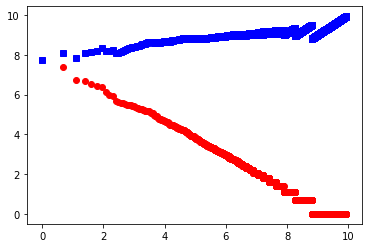

In [75]:
plt.plot([math.log(c) for c in LRanks], [math.log(c) for c in LFrqs], 'ro')
plt.plot([math.log(c) for c in LRanks], [math.log(c) for c in LCoef], 'bs')
# plt.plot([c for c in LRanks], [c for c in LFrqs], 'bs')


Now let's compare this to distributions in biological systems:

In [83]:
# !wget https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv
!wget https://heibox.uni-heidelberg.de/f/3feb8aa4b57145d6a6f2/?dl=1
!mv index.html?dl=1 students.csv

--2021-08-31 21:32:19--  https://heibox.uni-heidelberg.de/f/3feb8aa4b57145d6a6f2/?dl=1
Resolving heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)... 129.206.7.113
Connecting to heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)|129.206.7.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://heibox.uni-heidelberg.de/seafhttp/files/d58123c6-1f64-4391-a3e6-0411ab9fdd27/students.csv [following]
--2021-08-31 21:32:20--  https://heibox.uni-heidelberg.de/seafhttp/files/d58123c6-1f64-4391-a3e6-0411ab9fdd27/students.csv
Reusing existing connection to heibox.uni-heidelberg.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 1085090 (1.0M) [application/octet-stream]
Saving to: ‘index.html?dl=1’

index.html?dl=1     100%[===================>]   1.03M  1.20MB/s    in 0.9s    

2021-08-31 21:32:21 (1.20 MB/s) - ‘index.html?dl=1’ saved [1085090/1085090]



In [135]:
FileOutputStudents = open('students-frq.txt', 'w')
with open("students.csv", 'r') as file:
    csv_file = csv.DictReader(file)
    c = 0
    for row in csv_file:
        c+=1
        if c>10: break
        print(dict(row))


{'seq': '1', 'stud.id': '833917', 'name': 'Gonzales, Christina', 'gender': 'Female', 'age': '19', 'height': '160', 'weight': '64.8', 'religion': 'Muslim', 'nc.score': '1.91', 'semester': '1st', 'major': 'Political Science', 'minor': 'Social Sciences', 'score1': 'NA', 'score2': 'NA', 'online.tutorial': '0', 'graduated': '0', 'salary': 'NA'}
{'seq': '2', 'stud.id': '898539', 'name': "Lozano, T'Hani", 'gender': 'Female', 'age': '19', 'height': '172', 'weight': '73', 'religion': 'Other', 'nc.score': '1.56', 'semester': '2nd', 'major': 'Social Sciences', 'minor': 'Mathematics and Statistics', 'score1': 'NA', 'score2': 'NA', 'online.tutorial': '0', 'graduated': '0', 'salary': 'NA'}
{'seq': '3', 'stud.id': '379678', 'name': 'Williams, Hanh', 'gender': 'Female', 'age': '22', 'height': '168', 'weight': '70.6', 'religion': 'Protestant', 'nc.score': '1.24', 'semester': '3rd', 'major': 'Social Sciences', 'minor': 'Mathematics and Statistics', 'score1': '45', 'score2': '46', 'online.tutorial': '0',

In [136]:
with open("students.csv", 'r') as file:
    csv_file = csv.DictReader(file)

    DBiometricsM = {}
    DBiometricsF = {}
    for row in csv_file:
        DRow = dict(row)
        SID = DRow['stud.id']
        SGend = DRow['gender']
        SHeight = DRow['height']; IHeight = int(SHeight) # ; print(str(IHeight))
        # SWeight = DRow['weight']; FWeight = float(SWeight) # ; print(str(FWeight))
        if SGend == 'Female':
            try:
                DBiometricsF[IHeight] += 1
            except:
                DBiometricsF[IHeight] = 1

        if SGend == 'Male':
            try:
                DBiometricsM[IHeight] += 1
            except:
                DBiometricsM[IHeight] = 1

now we rank from lowest to highest

In [137]:
def rankDict(Dict2fill):
    LRanks = []
    LFrq = []
    LCoef = []

    rank = 0
    for IHeight, Frq in sorted(Dict2fill.items() , key=lambda x: x[0], reverse=False):
        rank +=1
        # if rank > 10: break
        coef = rank * Frq ; FileOutputStudents.write(str(rank) + '\t' + str(Frq) + '\t' + str(IHeight) + '\t' + str(coef) + '\n')
        LRanks.append(rank)
        LFrq.append(Frq)
        LCoef.append(coef)
    
    FileOutputStudents.write('\n\n')
    FileOutputStudents.write(str(len(LRanks)) + 'len of Ranks\n')
    FileOutputStudents.write(str(len(LFrq)) + 'len of Frqs\n')
    FileOutputStudents.write(str(len(LCoef)) + 'len of Coef\n')
    FileOutputStudents.flush()

    return LRanks, LFrq, LCoef

LRanksF, LFrqF, LCoefF = rankDict(DBiometricsF)
LRanksM, LFrqM, LCoefM = rankDict(DBiometricsM)




In [146]:
FileOutputStudents.close()

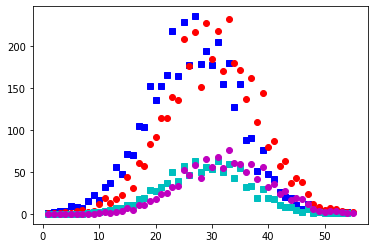

In [145]:
# plt.plot([math.log(c) for c in LRanks], [math.log(c) for c in LFrqs], 'ro')
# plt.plot([math.log(c) for c in LRanks], [math.log(c) for c in LCoef], 'bs')
plt.plot([c for c in LRanksF], [c for c in LFrqF], 'bs')
plt.plot([c for c in LRanksM], [c for c in LFrqM], 'ro')
plt.plot([c for c in LRanksF], [c/100 for c in LCoefF], 'cs')
plt.plot([c for c in LRanksM], [c/100 for c in LCoefM], 'mo')

# Foundations of Python:
1. Variables

2. Data types
- integers, floating point numbers
- strings
- lists, tuples
- dictionaries, multidimensional dictionaries
- files

3. Regular expressions
- Match and search
- Capturing expressions in context

4. Control flow statements
- if, elif, else
- while, for
- break, continue
- range

5. Functions
- standard functions (e.g., sorted)
- writing own functions

6. Classes and objects
- Object packages and libraries 
- Ideas of object-oriented programming

7. Writing reusable code and using others' libraries
- Principles of software engineering
- Using objects for Machine Learning (tensorflow, pytorch), text processing (NLTK), data visualisation